# Predicting the outcome of an IPL match using Random Forest Classifier

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O, data analysis

### Data Collection

In [2]:
matches=pd.read_csv("matches.csv")

### Data Exploration

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Data Cleaning

In [5]:
# to find which all columns has null values 
matches.apply(lambda x:sum(x.isnull()),axis=0)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [6]:
#printing the rows where the winner is null
print(len(matches[pd.isnull(matches['winner'])]))
matches[pd.isnull(matches['winner'])]

3


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [7]:
#filling those null values with "draw"
matches['winner'].fillna('Draw',inplace=True)

In [8]:
len(matches[pd.isnull(matches['winner'])])

0

In [9]:
print(len(matches[pd.isnull(matches['city'])]))
matches[pd.isnull(matches['city'])]

7


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [10]:
matches['city'].fillna('Dubai',inplace=True)

In [11]:
len(matches[pd.isnull(matches['city'])])

0

### Data Preprocessing

In [12]:
#replacing team names with their short forms
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [13]:
#replacing team short names with their respective integers in the columns team1,team2,toss_winner,winner
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [14]:
xx=matches.groupby(['toss_winner']).size()
# for key,value in xx.iteritems():
#      print(key,"   ",value,"\n")
print(xx.at[1])
yy=matches.groupby(['winner']).size()
# for key,value in yy.iteritems():
#      print(key,"   ",value,"\n")
print(yy.at[1])

85
92


In [15]:
dicVal = encode['winner']
print(dicVal['KKR']) #find value by key
print(list(dicVal.keys())[list(dicVal.values()).index(2)]) #find key by value search 

2
KKR


In [16]:
#considering only the required columns
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [18]:
df=pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [19]:
# reassuring that none of the columns has null values
df.apply(lambda x:sum(x.isnull()),axis=0)

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [20]:
print(df['city'].unique())
len(df['city'].unique())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai']


31

In [21]:
print(df['venue'].unique())
len(df['venue'].unique())

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai Inte

35

In [22]:
# Respresentation of label encoder (coverting strings to numerical values)
cat_list=df['city']
encoded_data,mapping_index=pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Bangalore"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4  8  7  5  6 10  0 11  0  8  4 11  5
  8  4  6  7  0 10 11  0  8  5 10  4 11  5  7  6 10  4 11  0 10  8  6  5
  8  7  5  7 10  0  6  4  6  5 11  8  7 11  4  6 10  0  5  5  5 12 12 12
 12 13 14 12 14 12 14 14 13 12 14 13 15 14 14 15 15 16 14 13 17 13 17 16
 14 14 15 15 15 16 18 18 13 17 18 15 15 14 14 14 19 13 17 17 19 15 17 14
 14 15 15 15 17 17  5  5  8  6 11 20  4  6  7  4  7 21 20  5 21 11  5  4
  8  5 20  8  4 20  5  7  5 11  7  6  8 11  5  6  7 22 11 10  6  4  8 22
  4  7 10 22  5 11 10 11 23  4  6 23  7  6  5  5  5  5 11  0 24  7  5  6
 10  4  8  5  0 10  5 11  0  5  6 24  7  5  6  8  5  6  7  0 10 11  7  5
 24  7 10  4 24  6 10 11  5  7  0 11  5 24  0  4  6  5  4  8 10  0  8 10
 11  3  4  5 23  3  5 23 11  5  5 23  7  4  6  5  5 11 11 11  6  5 10  4
 25 10  1 25  4  7  5 11  8  6  7  1  6  4  5 10  4

In [23]:
# Respresentation of label encoder (coverting strings to numerical values)
cat_list1=df['venue']
encoded_data1,mapping_index1=pd.Series(cat_list1).factorize()
#print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Nehru Stadium"))

Index(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Green Park',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', 'St George's Park', 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium', 'Sardar Patel Stadium, Motera',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Si

In [24]:
# Respresentation of label encoder (coverting strings to numerical values)
cat_list2=df['toss_decision']
encoded_data2,mapping_index2=pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc('field'))

Index(['field', 'bat'], dtype='object')
0


In [25]:
#find some stats on match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print('No.of toss winners by each team')
for idx,val in temp1.iteritems():
    print("{} -> {}".format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No.of match winners by each team')
for idx,val in temp2.iteritems():
    print("{} -> {}".format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No.of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No.of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


Text(0.5, 1.0, 'match winners')

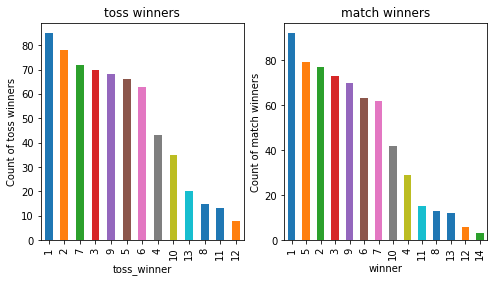

In [27]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("match winners")

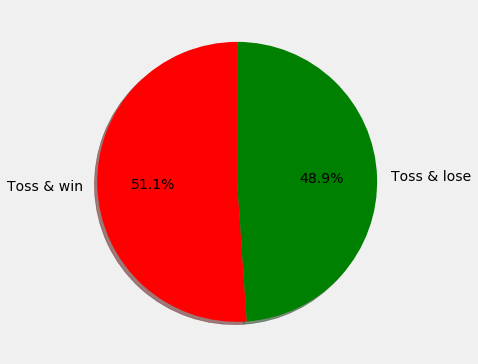

<module 'matplotlib.pyplot' from 'C:\\Users\\polep\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [28]:
#probability of match winning by winning toss for all teams
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(636-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 
mlt

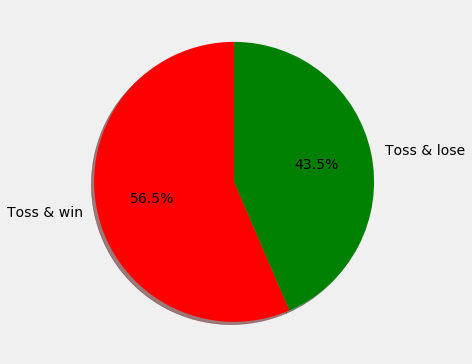

<module 'matplotlib.pyplot' from 'C:\\Users\\polep\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [29]:
#probability of match winning by winning toss for MI(index==1)
count=0
for i in range(636):
    if df["toss_winner"][i]==df["winner"][i]==1:
        count=count+1
import matplotlib.pyplot as mlt
#mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==1]
slices=[count,len(df_fil)-count]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 
mlt

## Model Development

In [30]:
#building predictive model, covert categorical to numerical data
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2
3,11,9,15,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,14,1,10,23,10
6,2,1,22,1,1,34,1
7,3,9,15,0,3,11,9
8,7,11,25,1,11,16,7
9,10,1,22,1,1,34,1


In [31]:
#import models from scikit learn module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [32]:
#generic function for making a classification model and accessing performance
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    #print(predictions)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(predictions,data[outcome]))
    print()
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s'%'{0:.3%}'.format(accuracy))

In [33]:
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']

### Evaluationg different Models 

In [34]:
#logistic regression
model=LogisticRegression()
print("LOGISTIC REGRESSION:\n")
classification_model(model,df,predictor_var,outcome_var)

LOGISTIC REGRESSION:

Confusion Matrix:
[[47 13 20 10  7 13  6  2  5  0  1  0  0  0]
 [16 37  5  3 12  5  7  2  3  4  1  2  1  0]
 [13  7 24  3 10  8  6  3  6  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  6 10  7 28 10 18  0  9  6  0  0  0  0]
 [ 6  4  6  0  8 12  3  0  4  3  1  1  2  0]
 [ 0  5  1  2  1  1  4  0  6  4  2  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  5  7  3 12 14 14  4 36 21  6  1  4  1]
 [ 0  0  0  0  1  0  4  2  1  2  4  0  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]]

Accuracy : 29.874%


C:\Users\polep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\polep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\polep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
print("GAUSSIAN NAIVE BAYES CLASSIFIER:\n")
classification_model(model,df,predictor_var,outcome_var)

GAUSSIAN NAIVE BAYES CLASSIFIER:

Confusion Matrix:
[[16  5  6  3  3  2  3  1  3  2  1  0  0  0]
 [12 18  4  0  7  1  2  0  2  0  0  0  0  0]
 [12  6 17  2  3  4  3  0  3  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 3  7  9  8 32 13 13  0  6  3  0  0  0  0]
 [ 1  1  3  1  5 12  5  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  0  3  2  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  2  5  0  1  1  0  0  2  2  1  0  0  0]
 [ 0  0  1  0  0  1  2  0  1  6  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [42 37 26 13 25 26 29 10 46 25 12  6  3  0]
 [ 3  1  1  1  3  2  1  1  1  2  1  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Accuracy : 19.025%


C:\Users\polep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
print("KNN ALGORITHM:\n")
classification_model(model,df,predictor_var,outcome_var)

KNN ALGORITHM:

Confusion Matrix:
[[78  6  7  2 10  1  2  1  4  0  1  1  0  0]
 [ 5 61  4  3  3  1  2  0  6  0  2  2  1  0]
 [ 0  6 47  6  8  4  5  1  6  2  2  0  1  2]
 [ 0  1  5 16  4  2  4  0  1  0  0  1  0  0]
 [ 3  0  2  2 49 10  4  0  3  0  0  0  0  0]
 [ 3  1  4  0  1 43  8  0  2  4  0  1  1  0]
 [ 0  1  2  0  2  0 29  3  3  5  0  0  1  1]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 2  1  2  0  1  2  5  1 41  3  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  3 27  1  1  2  0]
 [ 0  0  0  0  0  0  2  0  0  1  9  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Accuracy : 64.780%


C:\Users\polep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
#Support Vector Machines
from sklearn import svm
model=svm.SVC(kernel='rbf',C=1,gamma=1)
print("SUPPORT VECTOR MACHINES:\n")
classification_model(model,df,predictor_var,outcome_var)

SUPPORT VECTOR MACHINES:

Confusion Matrix:
[[87  3  4  1  2  1  2  0  2  0  1  1  0  0]
 [ 0 66  0  0  2  0  1  0  1  0  0  0  0  0]
 [ 0  4 65  1  2  0  4  1  4  2  1  0  0  1]
 [ 0  0  0 27  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  1  0 72  1  2  0  0  0  0  0  1  0]
 [ 2  1  2  0  1 59  1  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  1 48  1  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 1  2  1  0  0  1  3  0 63  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

Accuracy : 88.679%


C:\Users\polep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,max_depth=3,random_state=0)
print("GRADIENT BOOST ALGORITHM:\n")
classification_model(model,df,predictor_var,outcome_var)

GRADIENT BOOST ALGORITHM:



C:\Users\polep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[84  2  4  1  2  1  2  0  0  0  0  0  0  0]
 [ 1 69  0  0  2  0  2  0  2  0  0  0  0  0]
 [ 0  4 62  1  1  1  4  0  4  1  0  0  0  1]
 [ 0  0  0 27  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  2  0 72  1  2  0  0  0  0  0  0  0]
 [ 2  1  1  0  1 58  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1 47  1  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  0 12  0  0  0  0  0  0]
 [ 3  1  1  0  0  1  3  0 63  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  1 41  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

Accuracy : 89.151%


In [39]:
#Decision tree algorithm
from sklearn import tree
model=tree.DecisionTreeClassifier()
print("DECISION TREE ALGORITHM:\n")
classification_model(model,df,predictor_var,outcome_var)

DECISION TREE ALGORITHM:

Confusion Matrix:
[[90  3  4  1  4  2  2  0  2  0  0  0  0  0]
 [ 0 69  0  0  2  0  2  0  3  0  0  0  0  0]
 [ 0  4 68  1  2  2  4  1  5  2  1  0  0  1]
 [ 0  0  0 27  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0 71  2  2  0  0  0  0  0  1  0]
 [ 1  1  0  0  0 56  2  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 46  1  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  3  0 60  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

Accuracy : 89.151%


In [40]:
#Random Forest Classifier
model=RandomForestClassifier(n_estimators=100)
print("RANDOM FOREST CLASSIFIER:\n")
classification_model(model,df,predictor_var,outcome_var)

RANDOM FOREST CLASSIFIER:

Confusion Matrix:
[[85  2  3  1  2  1  2  0  2  0  0  0  0  0]
 [ 1 69  0  0  2  0  2  0  2  0  0  0  0  0]
 [ 1  4 64  0  2  1  4  0  4  1  1  0  0  1]
 [ 0  0  1 28  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  1  0 72  1  2  0  0  0  0  0  1  0]
 [ 2  1  1  0  1 58  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1 47  1  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  0 12  0  0  0  0  0  0]
 [ 1  1  1  0  0  1  3  0 60  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1 41  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]]

Accuracy : 89.151%


C:\Users\polep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#Determining the influence of each attribute on the output
print("Feature importances:")
imp_input=pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
imp_input

Feature importances:


team2            0.248126
team1            0.221767
toss_winner      0.176774
venue            0.168528
city             0.151698
toss_decision    0.033107
dtype: float64

### Predicting the match winner using Random Forest Classifier

In [42]:
rf = RandomForestClassifier(n_estimators=100)#no of trees
rf.fit(df[predictor_var],df[outcome_var])
rf_pred = rf.predict(df[predictor_var])

dicVal = encode['winner']
#print(dicVal['MI']) #key value
#print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

team_venue={'MI':'22','KKR':'21','RCB':'2','DC':'14','CSK':'7','RR':'16','DD':'9',"GL":'1','KXIP':'6','SRH':'14','RPS':'25','KTK':'20','PW':'25'}

#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1=input("Enter the team1:")
if team1 in dicVal:
    team2=input("Enter the team2:")
    if team2 in dicVal:
        if team1!=team2:
            toss_winner=input("Enter the toss winner:")
            if toss_winner in [team1,team2]:
                input1=[dicVal[team1],dicVal[team2],team_venue[team1],dicVal[toss_winner],'2','1']
                input1 = np.array(input1).reshape((1, -1))
                output=rf.predict(input1)
                pred_winner=list(dicVal.keys())[list(dicVal.values()).index(output)] #find key by value search output
                if pred_winner in [team1,team2]:
                    print("The predicted winner is:",pred_winner)
                else:
                    print("The predicted winner is:",toss_winner)
            else:
                print("Toss winner must either be Team1 or Team2")
        else:
            print("Team1 and Team2 cannot be same")
    else:
        print("Enter valid team name")
else:
    print("Enter valid team name")

C:\Users\polep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Enter the team1:MI
Enter the team2:SRH
Enter the toss winner:SRH
The predicted winner is: SRH
